# Unit 5: Data Storytelling

### Get going by asking the following questions and looking for the answers with some code and plots

(This will all eventually be basically a paper that describes what questions I want to answer. This will probably act very similar to a ReadMe file and it will outline my approach. Then at the end. I'll have a similar section that can be used to describe my findings and any further questions it has led me towards.)
 
**Brainstorm:** 
 
Can you count something interesting?

* This could include summary statistics for data
* The number of kids who dropped the course or gave up
    * What period did most kids stop being active?
    * Did these students have lower average durations on assessments
* Boxplot of duration
* Boxplot of grades (before and after cleaning)
* Try to see the spreads using histograms/bargraphs/boxplots for grades by type of assignmnet like quiz, assessment, project, rando etc.

Can you find some trends (high, low, increase, decrease, anomalies)?

* Increases in click history
* Trend for average page view duration (maybe use created_at instead of assessments? also, regardless of attempts too)
* Trend for grades on minor assessments over the semester
* Could plot all of the durations for assignments x = duration, y = assignments in ascending id order.
    * Could analyze later what the id and assignments actually are
    * Could also break down by students who were above or below the average into seperate graphs
* y = grade on assessment, x = duration (have to generalize this)(It would be too hard to make a thousand graphs for this)
* y = grade on assessment, x = number of attempts (how to graph this)


Can you make a bar plot or a histogram?

* bar plot of grades by section
* plot final course grades as a histogram
* plot grades (averages) as a trend (e.g a students grade over time, or averages on quizzes, assessments, projects etc.)

Can you compare two related quantities?

* Compare assessment, quiz, rando assignment, and test grades (Have to learn what these mean first)
    * see if it makes a difference to have below or above average duration for students
 
Can you make a scatterplot? (I guess do not actually do the linear regression in this section. Save that for Project 6.4)

* linear regression between amount of attempts and grades (of any kind, it can be broken down)

* linear regression between amount of time spent on an assessment and grades 

* Do assessment grades predict quiz and test grades?
 
Can you make a time-series plot?

* This will be about the same as trends. A time series would only work for the data sets that have a created_at field which are: 
Assessment Response Log, Assessment Page Views, Click History
* Note: There are trends for grades that would follow a succession of assignments, not necessarily a datetime object
* click history over time (would have to clean first and then prep it)
    * if click history goes up or down, is there a response seen somewhere else in the data
        * if average click history rises later, is that because low-activity students dropped the class (or didn't)
 

Other:
                                                                                                         
Mentor Question: Does the time spent on a page of an assessment correlate with the final grade in the class?

Does the amount of attempts on an assessment corelate with the final grade in the class?

Notes about a trend in grades?

* The grades sheet has assessments, rando assignments, quizzes, tests, and a final assessment
* Which one of these is indicative of student success/failure
* Is it just completing the quizzes and showing up gets you a better grade
* Really, it always boils down to participation, especially for a class like this
* If it is not participation then what could it be?

Is there a trend for view times? does the amount of time spent and amount of attempts decrease over the course of the semester?
                                                                                                         
                                                                                                         
I still have to think about what to do with Assessment Response Log; on its own and how it can augment the other data sets. 
                                                                                                         
I can also still explore more columns. Go through the data dictionary and make more notes of things to look at.                                                                                                          


In [13]:
#Import libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pendulum
import datetime

In [72]:
"""
EDA Section 1: Assessment Page Views
"""
df = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Assessment Page Views Fall 2018 Clean.csv', nrows = 10000)
df2 = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Assignment Duration Average with User Id.csv', nrows = 10000)
df3 = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Assessment Student Duration Averages.csv', nrows = 10000)
df4 = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Assessment Assignment Duration Averages.csv', nrows = 10000)
df5 = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Students with Above Average Assignment Duration.csv', nrows = 10000, index_col = 0)

In [94]:
df5_grouped = pd.DataFrame(df5.groupby(['canvas_assignment_id'])['Average Duration'].mean())
df5_grouped = df5_grouped.reset_index()
df5_grouped

,canvas_assignment_id,Average Duration
0,22476.0,3453.500000
1,31317.0,5811.400000
2,40876.0,8523.071050
3,40877.0,9374.497104
4,40878.0,7215.778582
5,40879.0,6867.094833
6,40880.0,7154.044459
7,40881.0,6929.582837
8,40882.0,4393.584441
9,40883.0,7865.209136


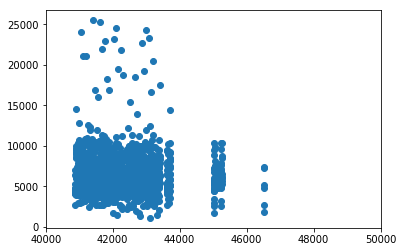

In [67]:
_ = plt.scatter(data = df4, x = 'canvas_assignment_id', y = 'Average Duration')
_ = plt.xlim(40000, 50000)
plt.show()

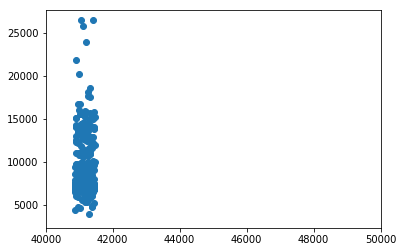

In [92]:
_ = plt.scatter(data = df5_grouped, x = 'canvas_assignment_id', y = 'Average Duration')
_ = plt.xlim(40000, 50000)
plt.show()

"""
what does this tell me about anything. That durations got shorter anyway as time went on, so looking at students that
had above average durations on assignments should not tell me much. What did I do wrong here? Every asssignment
should be respresented here. This should be a graph of all of the students who had above average durations for each 
assignmnet. Not just the total. I am an idiot. It looks like this since I only did the first 10000 rows I think.
If I do the full data frame it should be fine...
"""

In [11]:
"""
EDA Section 2: Course Grades
"""

'\nEDA Section 2: Course Grades\n'

In [12]:
"""
EDA Section 3: Click History
"""

'\nEDA Section 3: Click History\n'

### Conclusion

Just report my findings here and what I might look into going forward.